In [2]:
import pandas as pd
df=pd.read_csv("D:/Nivedhika_DA_Learning/project-ai usage analysis.csv")
df

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used
0,20-02-2025 03:29,Desktop,Education,14,7.08,5,GPT-5.1,44
1,08-01-2025 18:28,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047
2,12-01-2025 17:56,Smart Speaker,Education,236,10.15,4,GPT-4o,1379
3,04-01-2025 09:11,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105
4,14-02-2025 19:59,Smart Speaker,Research,220,4.50,5,GPT-5.1,107
...,...,...,...,...,...,...,...,...
295,13-02-2025 14:38,Tablet,Education,16,5.02,5,GPT-4o,413
296,29-01-2025 19:07,Smart Speaker,Productivity,28,13.49,3,GPT-4o,1493
297,05-03-2025 20:43,Tablet,Productivity,112,3.91,4,Mini,873
298,27-02-2025 21:23,Smart Speaker,Daily Tasks,105,1.61,4,o1,468


In [3]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

C:\Users\Sathyanarayanan\AppData\Local\Temp\ipykernel_560\1741446260.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["timestamp"] = pd.to_datetime(df["timestamp"])


,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107


In [4]:
df['Day'] = df['timestamp'].dt.day
df['Month'] = df['timestamp'].dt.month
df['Year'] = df['timestamp'].dt.year
df.head()

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used,Day,Month,Year
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44,20,2,2025
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047,8,1,2025
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379,12,1,2025
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105,4,1,2025
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107,14,2,2025


In [5]:
df.rename(columns={"timestamp":"Time_slot","usage_category":"Category","session_length_minutes":"Session_minutes","satisfaction_rating":"Rating","assistant_mode":"AI Model","tokens_used":"Token"},inplace=True)
df.head(4)

,Time_slot,device,Category,prompt_length,Session_minutes,Rating,assistant_model,Token,Day,Month,Year
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44,20,2,2025
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047,8,1,2025
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379,12,1,2025
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105,4,1,2025


In [6]:
df.drop(columns=["Time_slot"],inplace=True)
df.head()

,device,Category,prompt_length,Session_minutes,Rating,assistant_model,Token,Day,Month,Year
0,Desktop,Education,14,7.08,5,GPT-5.1,44,20,2,2025
1,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047,8,1,2025
2,Smart Speaker,Education,236,10.15,4,GPT-4o,1379,12,1,2025
3,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105,4,1,2025
4,Smart Speaker,Research,220,4.50,5,GPT-5.1,107,14,2,2025


In [7]:
cols = df.columns.tolist()
new_order = ["Year", "Month", "Day"] + [col for col in cols if col not in ["Year","Month","Day"]]
df = df[new_order]
df.head()

,Year,Month,Day,device,Category,prompt_length,Session_minutes,Rating,assistant_model,Token
0,2025,2,20,Desktop,Education,14,7.08,5,GPT-5.1,44
1,2025,1,8,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047
2,2025,1,12,Smart Speaker,Education,236,10.15,4,GPT-4o,1379
3,2025,1,4,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105
4,2025,2,14,Smart Speaker,Research,220,4.50,5,GPT-5.1,107


In [8]:
df.columns

Index(['Year', 'Month', 'Day', 'device', 'Category', 'prompt_length',
       'Session_minutes', 'Rating', 'assistant_model', 'Token'],
      dtype='object')

In [9]:
df.isnull().sum()

Year               0
Month              0
Day                0
device             0
Category           0
prompt_length      0
Session_minutes    0
Rating             0
assistant_model    0
Token              0
dtype: int64

In [10]:
df.shape

(300, 10)

<Axes: xlabel='prompt_length'>

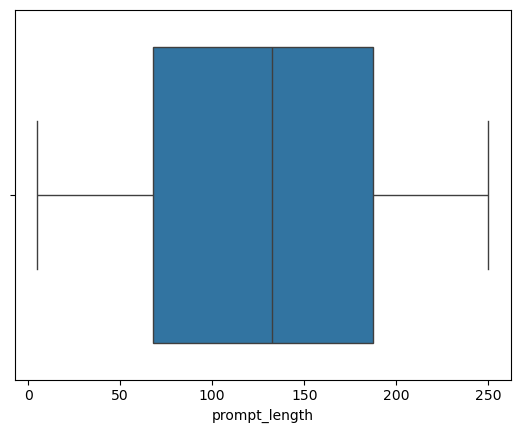

In [11]:
import seaborn as sns
sns.boxplot(x="prompt_length",data=df)

Text(0.5, 14.722222222222216, 'Prompt Length')

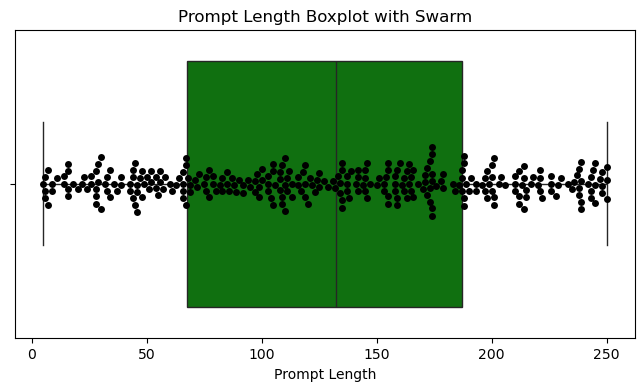

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sns.boxplot(x="prompt_length", data=df, color="green")
sns.swarmplot(x="prompt_length", data=df, color="black", size=5)

plt.title("Prompt Length Boxplot with Swarm")
plt.xlabel("Prompt Length")


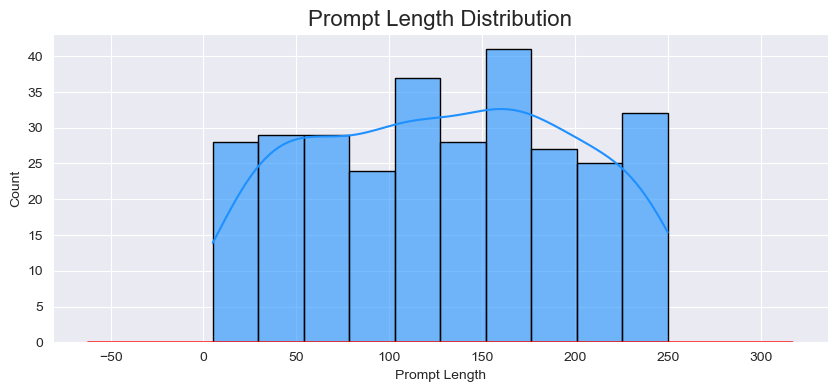

In [13]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,4))
sns.histplot( x="prompt_length", data=df, kde=True, color="dodgerblue",alpha=0.6,edgecolor="black")
sns.kdeplot(x=df["prompt_length"],color="red")        
plt.title("Prompt Length Distribution", fontsize=16)
plt.xlabel("Prompt Length")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='Token'>

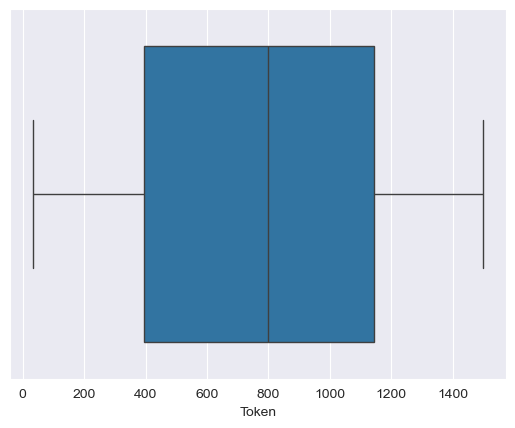

In [14]:
import seaborn as sns
sns.boxplot(x="Token",data=df)

Text(0.5, 16.722222222222214, 'Token Length')

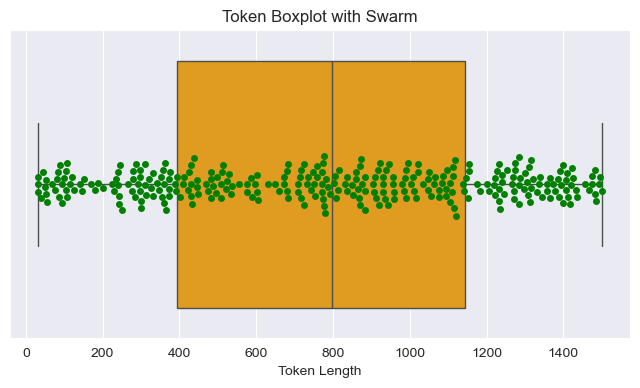

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sns.boxplot(x="Token", data=df, color="orange")
sns.swarmplot(x="Token", data=df, color="green", size=5)

plt.title("Token Boxplot with Swarm")
plt.xlabel("Token Length")

<Axes: xlabel='Session_minutes'>

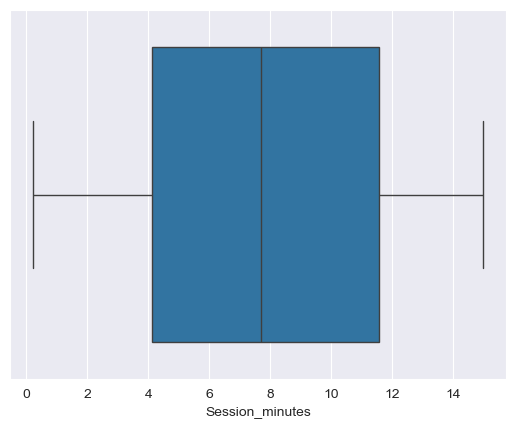

In [16]:
import seaborn as sns
sns.boxplot(x="Session_minutes",data=df)

Text(0.5, 16.722222222222214, 'Session_minutes length')

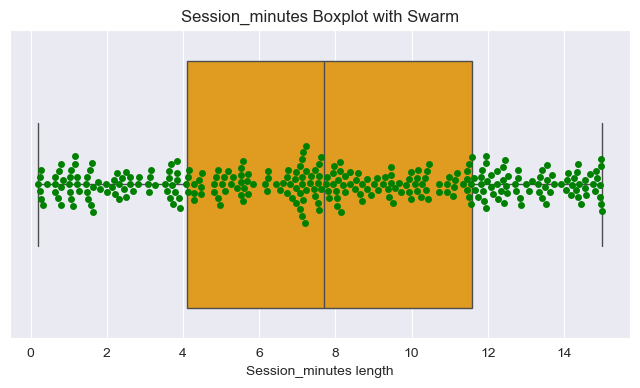

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))

sns.boxplot(x="Session_minutes", data=df, color="orange")
sns.swarmplot(x="Session_minutes", data=df, color="green", size=5)

plt.title("Session_minutes Boxplot with Swarm")
plt.xlabel("Session_minutes length")

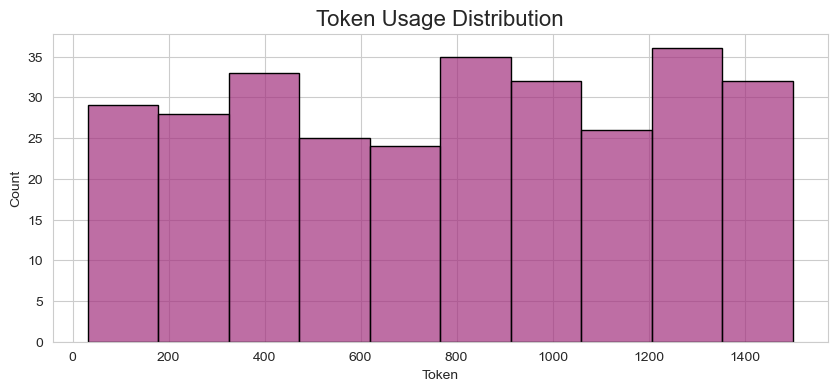

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")
color_magma = sns.color_palette("magma", 10)[4]   

plt.figure(figsize=(10,4))
sns.histplot(x="Token", data=df, kde=False, color=color_magma, alpha=0.7, edgecolor="black")
plt.title("Token Usage Distribution", fontsize=16)
plt.xlabel("Token")
plt.ylabel("Count")
plt.show()

In [19]:
# Z-score --x-u/std
df["z-score"]=(df.Token-df.Token.mean())/df.Token.std()
df.head(4)

C:\Users\Sathyanarayanan\AppData\Local\Temp\ipykernel_560\4041552134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["z-score"]=(df.Token-df.Token.mean())/df.Token.std()


,Year,Month,Day,device,Category,prompt_length,Session_minutes,Rating,assistant_model,Token,z-score
0,2025,2,20,Desktop,Education,14,7.08,5,GPT-5.1,44,-1.719784
1,2025,1,8,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047,0.622181
2,2025,1,12,Smart Speaker,Education,236,10.15,4,GPT-4o,1379,1.397388
3,2025,1,4,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105,0.757609


C:\Users\Sathyanarayanan\AppData\Local\Temp\ipykernel_43400\347597392.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index,y=model_counts.values, palette="Set2")


<function matplotlib.pyplot.show(close=None, block=None)>

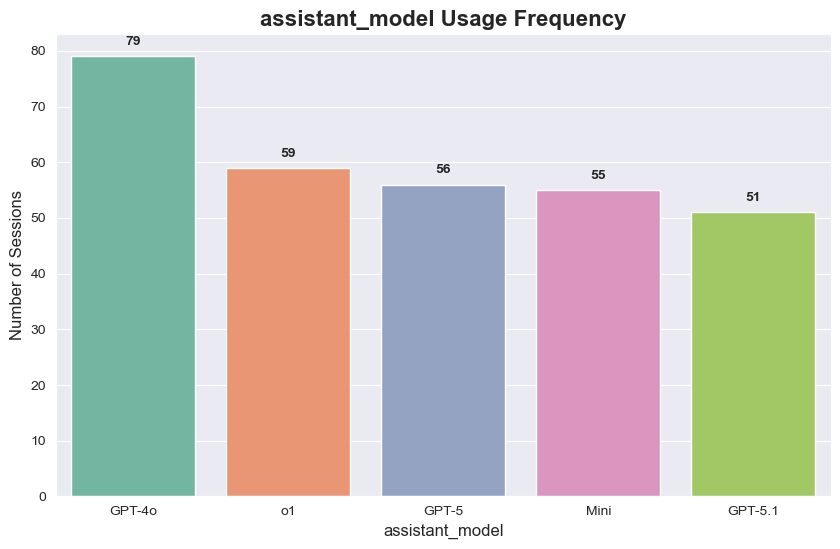

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


model_counts = df['assistant_model'].value_counts()


plt.figure(figsize=(10,6))
sns.barplot(x=model_counts.index,y=model_counts.values, palette="Set2")  
plt.title("assistant_model Usage Frequency", fontsize=16, fontweight='bold')
plt.xlabel("assistant_model", fontsize=12)
plt.ylabel("Number of Sessions", fontsize=12)

for i, v in enumerate(model_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontsize=10, fontweight='bold')

plt.show

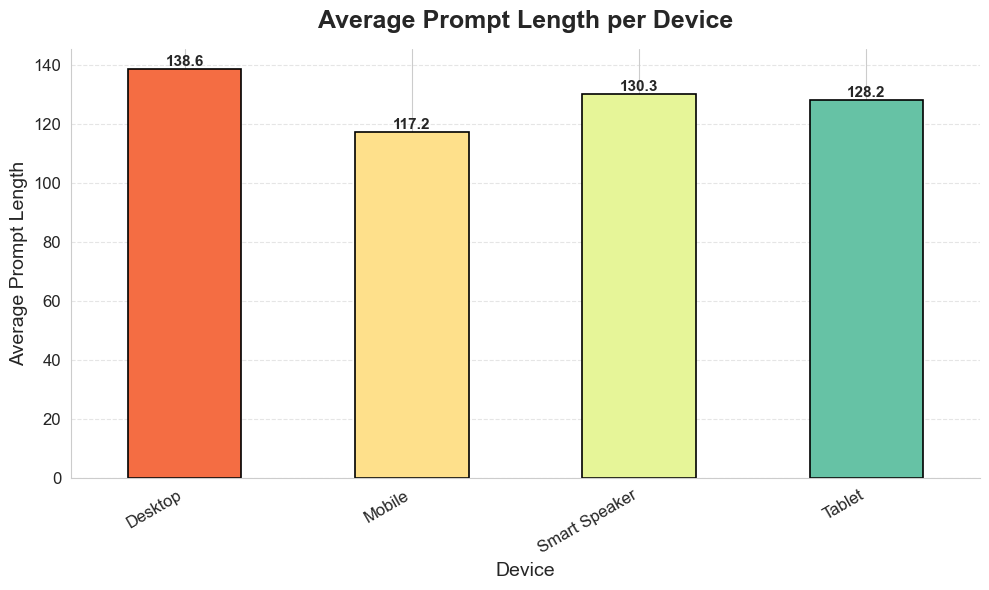

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Spectral", df["device"].nunique())

plt.figure(figsize=(10,6))
ax = df.groupby("device")["prompt_length"].mean().plot(kind="bar",color=colors, edgecolor="black", linewidth=1.2)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha="center", va="bottom",
                fontsize=11, fontweight="bold")

plt.title("Average Prompt Length per Device", fontsize=18, fontweight="bold", pad=15)
plt.xlabel("Device", fontsize=14)
plt.ylabel("Average Prompt Length", fontsize=14)
plt.xticks(rotation=30, fontsize=12, ha="right")
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
sns.despine()
plt.tight_layout()

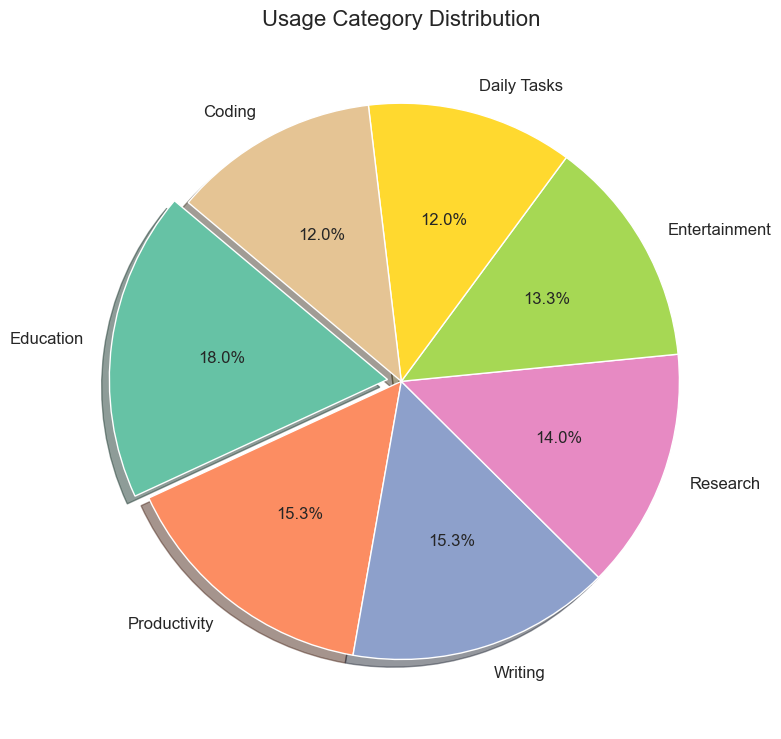

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns


colors = sns.color_palette("Set2", df["Category"].nunique())
explode = [0.05 if i == df["Category"].value_counts().idxmax() else 0 for i in df["Category"].value_counts().index]
plt.figure(figsize=(8,8))
df["Category"].value_counts().plot(kind="pie",autopct='%1.1f%%',startangle=140, colors=colors,shadow=True,explode=explode,textprops={'fontsize': 12})

plt.title("Usage Category Distribution", fontsize=16)
plt.ylabel("")  
plt.tight_layout().
plt.show()

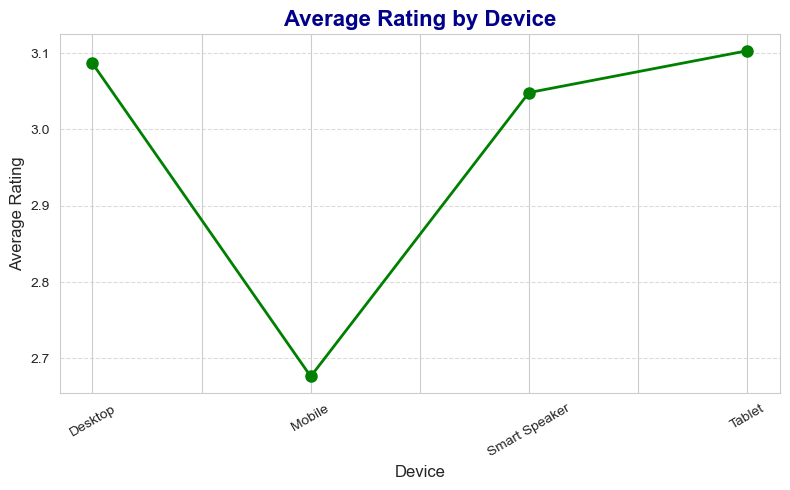

In [77]:
import matplotlib.pyplot as plt

avg_rating = df.groupby('device')['Rating'].mean()

plt.figure(figsize=(8,5))
avg_rating.plot(kind='line', marker='o',  color='green',  linewidth=2, markersize=8)

plt.title("Average Rating by Device", fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel("Average Rating", fontsize=12)
plt.xlabel("Device", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30) 
plt.tight_layout()
plt.show()

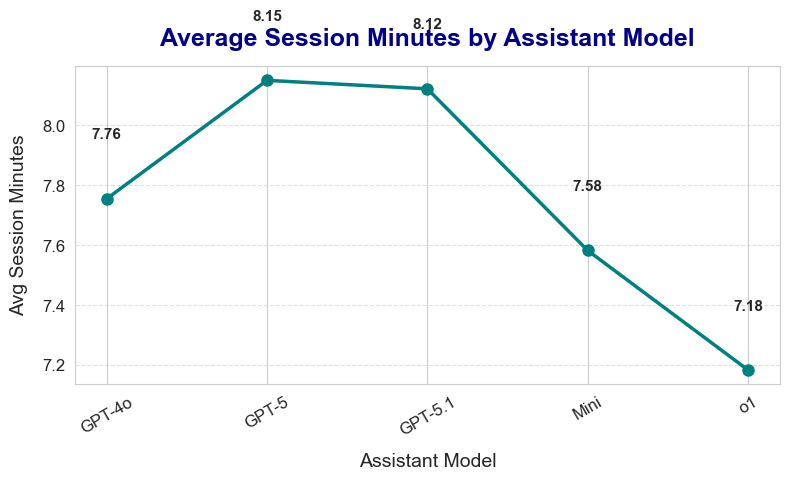

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


avg_session = df.groupby('assistant_model')['Session_minutes'].mean()
plt.figure(figsize=(8,5))

plt.plot(avg_session.index, avg_session.values, 
         marker='o', linestyle='-', color='teal', 
         linewidth=2.5, markersize=8)

for x, y in zip(avg_session.index, avg_session.values):
    plt.text(x, y+0.2, f"{y:.2f}", ha='center', fontsize=11, fontweight='bold')

plt.title("Average Session Minutes by Assistant Model", fontsize=18, fontweight='bold', color='darkblue', pad=15)
plt.xlabel("Assistant Model", fontsize=14, labelpad=10)
plt.ylabel("Avg Session Minutes", fontsize=14, labelpad=10)

# Grid and ticks
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=30, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Chi-square: 32.64625901689178, df: 24, p-value: 0.11176010392967896


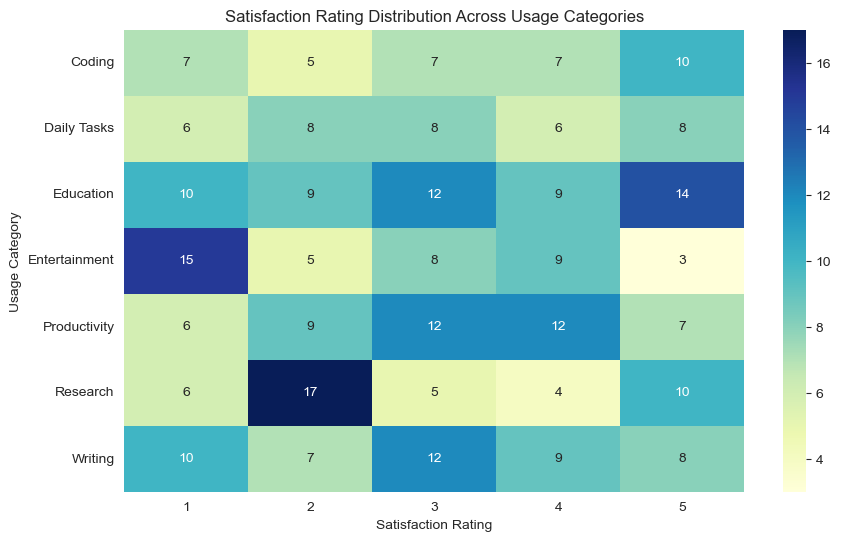

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Contingency table
contingency = pd.crosstab(df['Category'], df['Rating'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square: {chi2}, df: {dof}, p-value: {p}")

# Heatmap visualization
plt.figure(figsize=(10,6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Satisfaction Rating Distribution Across Usage Categories")
plt.xlabel("Satisfaction Rating")
plt.ylabel("Usage Category")
plt.show()

In [ ]:
# Overall Summary:


* ----The dataset shows variation in prompt length and token usage depending on device and category----*

*---- Smart Speaker sessions tend to be longer and use more tokens, but ratings vary widely (from 1 to 5)----*

*---- Desktop session was short and concise, with a perfect rating----*

*---- Mobile session had moderate prompt length but a low rating----*

*---- Education prompts appear twice, with both extremes: shortest and longest----*